In [15]:
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image

img = np.asarray(Image.open("Sphinx.png"))


Width = img.shape[0]
Height = img.shape[1]

tst = np.ones([20,20])

FD = np.fft.fft2(img)
FDs = np.fft.fftshift(FD)



In [16]:
def HP_filter_FD(W,H,D0):
    HP = np.zeros([W,H])
    c_i = (W//2)
    c_j = (H//2)
    for i in range(-c_i,c_i):
        for j in range(-c_j,c_j):
            if np.sqrt(i**2 + j**2) > D0:
                HP[c_i+i,c_j+j] = 1
    return HP

In [17]:
def HB_filter_FD(W,H,D0,A):
    HP_filter_FD(W,H,D0)
    HB = np.zeros([W,H])
    c_i = (W//2)
    c_j = (H//2)
    for i in range(-c_i,c_i):
        for j in range(-c_j,c_j):
            if np.sqrt(i**2 + j**2) > D0:
                HB[c_i+i,c_j+j] = 1
    return HB

TypeError: Image data of dtype complex128 cannot be converted to float

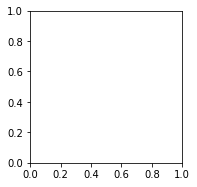

In [27]:


hp = HP_filter_FD(Width,Height,4)
#hb = HB_filter_FD(20,20,4,3)

hp_img_FD = np.multiply(FDs,hp)



#Ishift = np.fft.ifftshift(hp_img_FD)
#hp_img = np.fft.ifft(Ishift)


plt.subplot(121),plt.imshow(FD, cmap = 'gray')
plt.subplot(122),plt.imshow(hp_img_FD, cmap = 'gray')